#Spam Filtering

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv(r'C:\Users\Ananyaa Bansal\Downloads\archive\spam.csv', encoding='latin-1')
data.head(n=10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


# The ham data is collected

In [3]:
data[data['v1']=='ham']

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
...,...,...,...,...,...
5565,ham,Huh y lei...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# The spam data is collected

In [4]:
data[data['v1']=='spam'] 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN
...,...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN


In [6]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm #sklearn library
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

# Plotting the graph indicating the v1 category of the dataframe


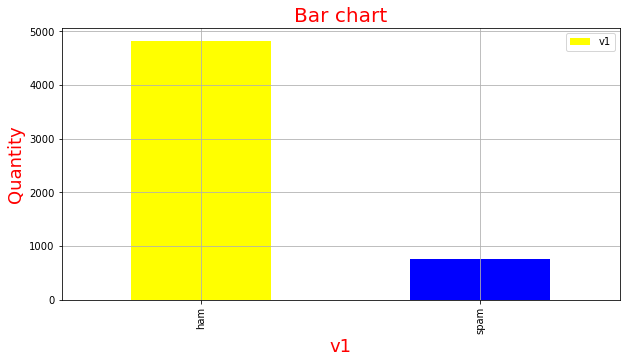

In [7]:
plt.figure(figsize=(10,5))

count_v1=pd.value_counts(data["v1"],sort= True)
count_v1.plot(kind = 'bar', color= ["yellow", "blue"])

plt.title('Bar chart',color='r',fontsize=20)
plt.ylabel('Quantity',fontsize=18,color='r')
plt.xlabel("v1",fontsize=18,color='r')

plt.grid()
plt.legend()
plt.show()

# Counting of frequent words in non-spam messages

In [8]:
count1 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "Words in Non-Spam", 1 : "Count"})
df1

,Words in Non-Spam,Count
0,to,1530
1,you,1458
2,I,1436
3,the,1019
4,a,969
5,and,738
6,i,736
7,in,734
8,u,645
9,is,638


# Counting of frequent words in Spam messages


In [9]:
count2 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "Words in Spam", 1 : "Count"})
df2

,Words in Spam,Count
0,to,604
1,a,358
2,your,187
3,call,185
4,or,185
5,the,178
6,2,169
7,for,169
8,you,164
9,is,143


# Plotting bar of the df1 dataframe

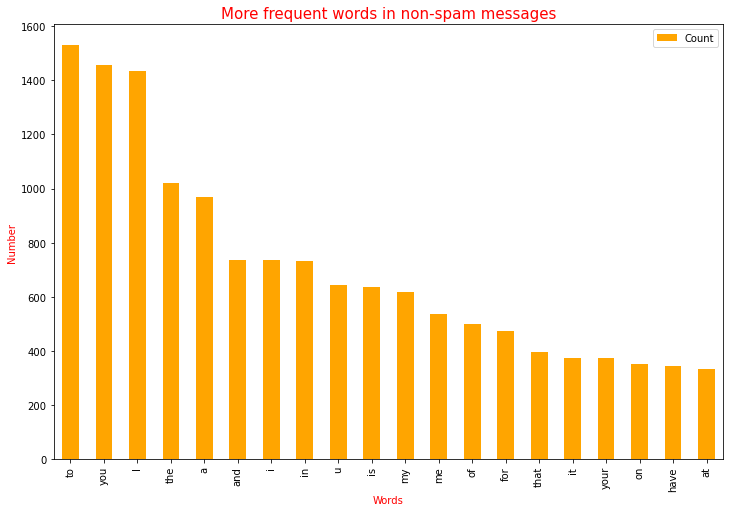

In [10]:
df1.plot.bar(legend = True,color='orange',figsize=(12,8))

y_pos = np.arange(len(df1["Words in Non-Spam"]))

plt.xticks(y_pos, df1["Words in Non-Spam"])
plt.title('More frequent words in non-spam messages',color='r',fontsize=15)

plt.xlabel('Words',color='r',fontsize=10)
plt.ylabel('Number',color='r',fontsize=10)
plt.show()

# Plotting bar of the df2 dataframe


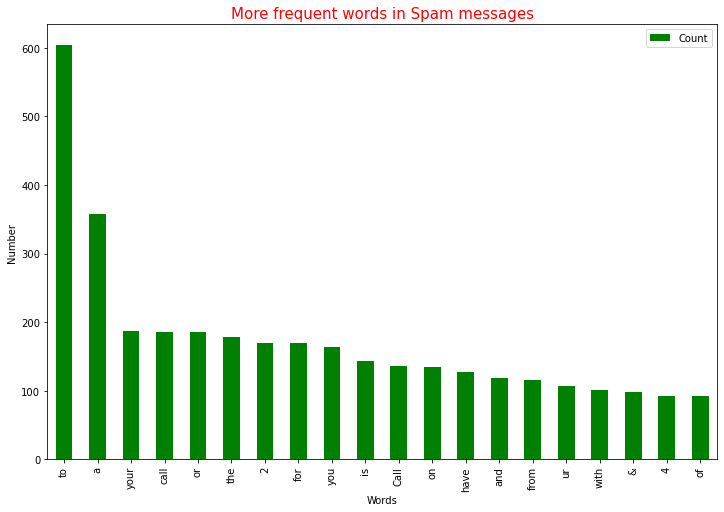

In [11]:
df2.plot.bar(legend = True, color = 'Green',figsize=(12,8))

y_pos = np.arange(len(df2["Words in Spam"]))

plt.xticks(y_pos, df2["Words in Spam"])

plt.title('More frequent words in Spam messages',color='r',fontsize=15)
plt.xlabel('Words',fontsize=10)
plt.ylabel('Number',fontsize=10)
plt.show()

# Introducing Feature Engineering for Spam Filteration


In [12]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["v2"])
np.shape(X)

(5572, 8404)

# Dividing the data into training and testing 

In [13]:
data["v1"]=data["v1"].map({'spam':1,'ham':0}) #Mapping the spam messages

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size=0.33, random_state=42)

print([np.shape(X_train), np.shape(X_test)]) #The shape of train and test data

[(3733, 8404), (1839, 8404)]


# SVM - SUPPORT VECTOR MACHINE CLASSIFIER

In [11]:
list_C = np.arange(500, 2000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

# Accuracy and Precision of Test and Training Data

In [12]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,1.0,0.979337,0.853175,0.99537
1,600.0,1.0,0.979337,0.853175,0.99537
2,700.0,1.0,0.979337,0.853175,0.99537
3,800.0,1.0,0.979337,0.853175,0.99537
4,900.0,1.0,0.979337,0.853175,0.99537
5,1000.0,1.0,0.979337,0.853175,0.99537
6,1100.0,1.0,0.979337,0.853175,0.99537
7,1200.0,1.0,0.979337,0.853175,0.99537
8,1300.0,1.0,0.979337,0.853175,0.99537
9,1400.0,1.0,0.979337,0.853175,0.99537


# Selecting the model with the Most test Precision

In [13]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      1.000000
Test Accuracy       0.979337
Test Recall         0.853175
Test Precision      0.995370
Name: 0, dtype: float64

# Confusion matrix with SVM Classifier

In [17]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1586,1
Actual 1,37,215
